In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Задача 1

Напишите функцию умножения трёх матриц без использования встроенных средств `np.dot()`, **@**.

In [ ]:
# Ваше решение
""" For matrix multiplication, the number of columns in the first matrix
    must be equal to the number of rows in the second matrix """ 

a_matrix = np.random.randint(-5,5,(2,5))
b_matrix = np.random.randint(-1,3,(5,2))
c_matrix = np.random.randint(0,5,(2,2))

matrix_list = [a_matrix, b_matrix, c_matrix]

In [ ]:
print(a_matrix, end='\n\n')
print(b_matrix, end='\n\n')
print(c_matrix, end='\n\n')

[[ 3  0 -1 -5  0]
 [-4  3  4  0  3]]

[[ 0 -1]
 [-1  1]
 [-1  1]
 [-1  0]
 [-1 -1]]

[[0 4]
 [1 4]]



In [ ]:
def matrix_multiplication(matrix_a, matrix_b):
    if matrix_a.shape[1] != matrix_b.shape[0]:
        print("You are trying to multiply two matrices with wrong dimensions!\n\
The number of columns in the 1st matrix isn't equal to the\
number of rows in the 2nd matrix.")
    else:
        # define the matrix with zeros with same dimension as final matrix
        rows, cols = a_matrix.shape[0], b_matrix.shape[1]
        result = [([0]*cols) for i in range(rows)]

        # iterate through rows of matrix_a
        for i in range(len(matrix_a)):
            # iterate through columns of matrix_b
            for j in range(len(matrix_b[0])):
                # iterate through rows of matrix_b
                for k in range(len(matrix_b)):
                    result[i][j] += matrix_a[i][k] * matrix_b[k][j]
        return np.array(result)

In [ ]:
final_matrix = None

#itterate over all matrices in the list
for matrix in matrix_list:
    if final_matrix is None:
        final_matrix = matrix
    else:
        # multiply all consecutive matrix on previous result
        final_matrix = matrix_multiplication(final_matrix, matrix)

In [ ]:
final_matrix

array([[-4,  8],
       [ 8, -8]])

### Задача 2

Нужно вывести на печать матрицу размером N*N, заполненную числами натурального ряда, начиная с первого элемента и двигаясь по спирали:

---

В зависимости от введенных данных результат может выглядеть так:

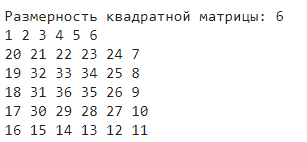

In [ ]:
# Ваше решение
import random
import math

#input
numbers = list(range(134))

In [ ]:
# find square matrix's dimensions
def find_matrix_dimension(input_numbers : list):
    #if list non empty
    if input_numbers:
        for i in range(len(input_numbers)):
            total = i*i
            #itterate until you find the multiplier that reaches the target
            if total >= len(input_numbers):
                square_side = i
                print(f'Dimensions for the matrix is {square_side} x {square_side}')

                # create an empty square matrix to fill it in with values
                empty_matrix = np.zeros((square_side, square_side))
                empty_matrix = empty_matrix.astype(int)
                break
            
        return empty_matrix
    else: 
      print(f'Error! An empty list provided!')

In [ ]:
def prepare_numbers_list(numbers: list, empty_matrix):
    """count how many zeros to add to the list
       to make it equal to cells' number in the matrix"""
    cells_count = empty_matrix.size           # number of cells
    numbers_count = len(numbers)              # number of numbers 
    # the difference to be filled with 0
    empty_cells = cells_count - numbers_count 
    empty_list = [0] * empty_cells
    numbers = empty_list + numbers

    #sort
    numbers.sort(reverse=True)

    return empty_matrix, numbers

In [ ]:
def final_matrix(empty_matrix, numbers):
    rows_number = empty_matrix.shape[0]
    columns_number = empty_matrix.shape[1]
    rows_start = 0
    columns_start = 0

    try:
        #fill in the matix to the right
        for i in range(rows_start, rows_number):
            rows_number -= 1
            rows_start += 1
            for j in range(columns_start, columns_number):
                empty_matrix[i,j] = numbers.pop()

                #fill in the matix downwards
                if j == (columns_number - 1):
                    for i in range(rows_start, rows_number):
                        empty_matrix[i,j] = numbers.pop()

                        #fill in the matix to the left
                        if i == (rows_number - 1):
                            for j in reversed(range(columns_start, columns_number)):
                                empty_matrix[i+1,j] = numbers.pop()
                            
                                #fill in the matix upwards
                                if j == columns_start:
                                    columns_start += 1
                                    columns_number -= 1
                                    for i in reversed(range(rows_start, rows_number)):
                                        empty_matrix[i,j] = numbers.pop()
    except IndexError:
        pass
    return empty_matrix

In [ ]:
empty_matrix = find_matrix_dimension(numbers)
empty_matrix, numbers = prepare_numbers_list(numbers, empty_matrix)
solution = final_matrix(empty_matrix, numbers)

Dimensions for the matrix is 12 x 12


In [ ]:
solution

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,   2],
       [ 32,  69,  70,  71,  72,  73,  74,  75,  76,  77,  44,   3],
       [ 31,  68,  97,  98,  99, 100, 101, 102, 103,  78,  45,   4],
       [ 30,  67,  96, 117, 118, 119, 120, 121, 104,  79,  46,   5],
       [ 29,  66,  95, 116, 129, 130, 131, 122, 105,  80,  47,   6],
       [ 28,  65,  94, 115, 128, 132, 133, 123, 106,  81,  48,   7],
       [ 27,  64,  93, 114, 127, 126, 125, 124, 107,  82,  49,   8],
       [ 26,  63,  92, 113, 112, 111, 110, 109, 108,  83,  50,   9],
       [ 25,  62,  91,  90,  89,  88,  87,  86,  85,  84,  51,  10],
       [ 24,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  11],
       [ 23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12]])

### Задача 3

Используя библиотеку `numpy` найдите количество будних дней в феврале 2015 года.

---

Ваш результат может выглядеть так:

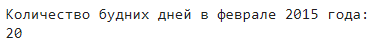

При решении задания вам может пригодиться метод numpy.busday_count()

---
Дополнительная информация ([База знаний УИИ - «**Функции DateTime в Numpy**»](https://colab.research.google.com/drive/1gSg4eZkpGwP0Zs5VGhl8uMhoo2Gmsil6?usp=sharing))

---






In [ ]:
# Ваше решение
start_date = '2015-02'
end_date = '2015-03'
working_days = np.busday_count(start_date, end_date, weekmask='1111100')

print(f'The number of working days in February of 2015 were {working_days}.')

The number of working days in February of 2015 were 20.


### Задача 4

Создайте гистограмму, содержащую различные варианты текстур.

---

В зависимости от введенных данных результат может выглядеть так:

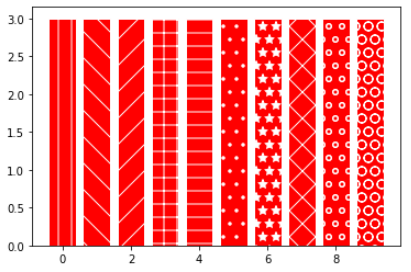

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Страшное искусство!')

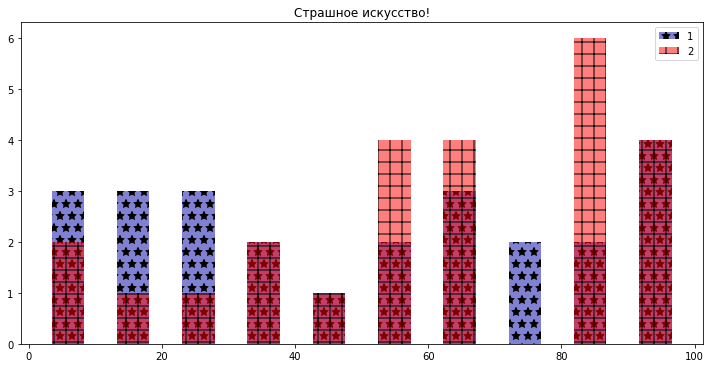

In [ ]:
# Ваше решение
#input
to_plot = np.random.randint(0,100,25)
to_plot_2 = np.random.randint(0,100,25)

fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.hist(to_plot, bins=10, color='#0504aa', alpha=0.5, rwidth=0.5,
         hatch="*", label='1')
ax2.hist(to_plot_2, bins=10, color='red', alpha=0.5, rwidth=0.5,
         hatch="+", label='2')
plt.tight_layout()
plt.legend()
plt.title('Страшное искусство!')

### Задача 5

Постройте точечную диаграмму с использованием случайных распределений для создания шариков разных размеров.

---

В зависимости от введенных данных результат может выглядеть так:

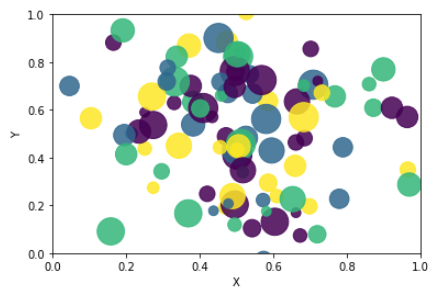

При решении задания вам может пригодиться метод `plt.scatter()`

---
Дополнительная информация ([База знаний УИИ - «**Scatter - график разброса**»](https://colab.research.google.com/drive/1DvReBj0GxdwVaQ72WUleiIwQGer1-vfn?usp=sharing))

---







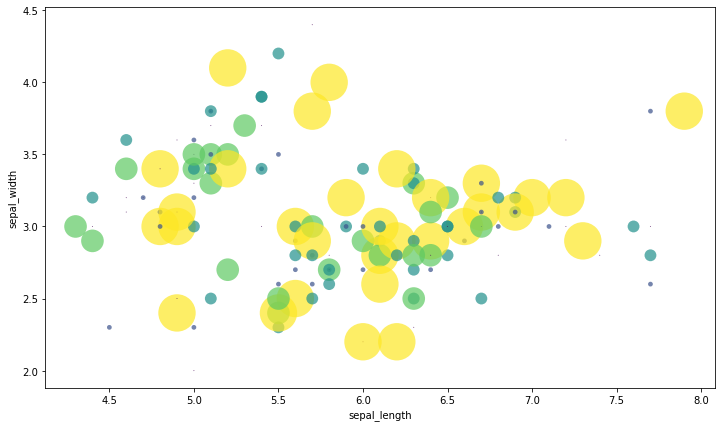

In [ ]:
# Ваше решение
#bad option
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.cm as cm

data = load_iris()

data = pd.DataFrame(data= np.c_[data['data'], data['target']],
                    columns= data['feature_names'] + ['target'])

data.columns = ['sepal_length', 'sepal_width', 
                'petal_length', 'petal_width', 'target']

data['size'] = np.random.randint(1, 6, data.shape[0])

fig = plt.figure(figsize=[12,7])
plt.scatter(x = data['sepal_length'],
            y = data['sepal_width'],
            s = data['size']**4.5,
            c = data['size'],
            cmap=cm.viridis,
            edgecolors = 'none',
            alpha = 0.7)

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [ ]:
#good option
import plotly.express as px
    
plot = px.scatter(data, x = 'sepal_length',
                  y = 'sepal_width',
                  color="size",
                  size='size',
                  hover_data=['size'])
plot.show()